# Google's Quick Draw Dataset and GANs
## Lawton Manning, John Farrell, and Liyao Zhang

*Before running this Notebook:* <br> Make sure to download the QuickDraw files corresponding to the '.npy' filetype.

More information on Google's Quick Draw dataset found in their repository here: https://github.com/googlecreativelab/quickdraw-dataset 

## Loading the Data:

In [1]:
import numpy as np
import pandas as pd

from os import listdir
from os.path import basename, isfile, join

from matplotlib.pyplot import imshow

In [2]:
metadata = pd.read_csv(join('data', 'metadata.csv'))

In [3]:
%reload_ext autoreload
%autoreload 2
from DataGenerator import DataGenerator

datagen = DataGenerator(metadata, 32)   # locally defined Datagen class specific to Google's QuickDraw
datagen.n_classes

16

## Creating the GAN Model:
In order to model our GAN, we must define the two sub-models that comprise GANs in general. Collectively, they will learn to create sketches from Google's QuickDraw 28x28 greyscale images.
    
1. Discriminator - given an input image, determine if the image is real or fake
2. Generator - learn how to generate an image which fools the discriminator (so that it cannot distinguish real/fake reliably)
    

In [ ]:
from GAN import GAN

gan = GAN(datagen)
gan.train(epochs=20)

>1, 1/500, d1=4.031, d2=0.720 g=0.653
>2, 1/500, d1=0.000, d2=0.000 g=9.899
>3, 1/500, d1=0.000, d2=0.000 g=12.584
>4, 1/500, d1=0.000, d2=0.000 g=13.562
>5, 1/500, d1=0.000, d2=0.000 g=14.498
>6, 1/500, d1=0.000, d2=0.000 g=15.292
>7, 1/500, d1=0.000, d2=0.000 g=16.053
>8, 1/500, d1=0.000, d2=0.000 g=16.951
>9, 1/500, d1=0.000, d2=0.000 g=17.688


## Visualizing Results

### Generator Images

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
generator = keras.models.load_model('cgan_generator.h5')

In [2]:
# randomly generate latent space for generator input
def gen_latent_space(latent_dim, batch_size):
    x_input = np.random.randn(latent_dim * batch_size)
    x_input = x_input.reshape(batch_size, latent_dim)
    return x_input

In [3]:
import matplotlib.pyplot as plt
def grid_images(imgs):
    n_row = 4
    n_col = 4
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img, cmap='gray')
    plt.show()

In [4]:
total_categories = 16
latent_dim = 100

def gen_results(model):
    # generate random latent space
    latent_space = gen_latent_space(latent_dim, total_categories)
    labels_range = np.arange(0, total_categories)
    
    # feed into generator to predict one image for each category
    X = model.predict([latent_space, labels_range])
    imgs = np.squeeze(X)
    grid_images(imgs)
    
    return (X, labels_range)

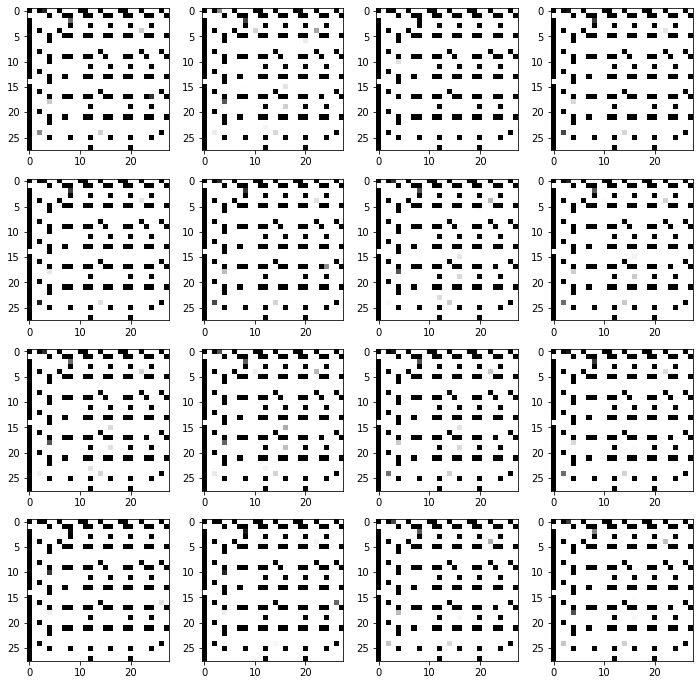

In [5]:
[X_fake, labels_fake] = gen_results(generator)

### Discriminator Results:

In [6]:
discriminator = keras.models.load_model('cgan_discriminator.h5')

In [7]:
y_fake = np.zeros((16, 1))
loss, _ = discriminator.train_on_batch([X_fake, labels_fake], y_fake)

In [8]:
print(loss)

1.263623571284931e-14


### GAN results:

In [18]:
gan_model = keras.models.load_model('cgan_GAN.h5')

In [16]:
latent_space = gen_latent_space(100, 16)

# create inverted labels for the fake samples
y_gan = np.ones((16, 1))

# update the generator via the discriminator's error
g_loss = gan_model.train_on_batch([latent_space, labels_fake], y_gan)

In [17]:
g_loss

34.819908142089844